<a href="https://colab.research.google.com/github/aneesh98/HeartDiseasePrediction/blob/master/DrivenDataMachineLearningWithHeart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://s3.amazonaws.com/drivendata/data/54/public/train_values.csv

--2019-09-06 07:51:36--  https://s3.amazonaws.com/drivendata/data/54/public/train_values.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.146.85
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.146.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9591 (9.4K) [text/csv]
Saving to: ‘train_values.csv’

train_values.csv    100%[===================>]   9.37K  --.-KB/s    in 0s      

2019-09-06 07:51:36 (139 MB/s) - ‘train_values.csv’ saved [9591/9591]



In [0]:
!wget https://s3.amazonaws.com/drivendata/data/54/public/train_labels.csv

In [27]:
import pandas as pd
df = pd.read_csv('train_values.csv')
df_l = pd.read_csv('train_labels.csv')
df_l.head()
df_labels = pd.DataFrame({'Target':df_l['heart_disease_present']})
df_ = pd.concat([df, df_labels] , axis = 1)

df_.head(10)
df_.loc[df['thal'] == 'normal', 'thal'] = 1
df_.loc[df['thal'] == 'fixed_defect', 'thal'] = 2
df_.loc[df['thal'] == 'reversible_defect', 'thal'] = 3
##Contingency Table
data_ct = pd.crosstab(df_['thal'], df_['Target'], margins = False)
print(data_ct)

Target   0   1
thal          
1       78  20
2        4   4
3       18  56


In [0]:
df_
X = df_.iloc[:, 1:df.shape[1]]
X

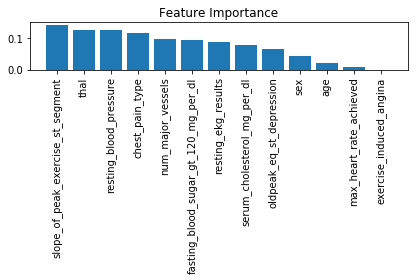

In [25]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
y = df_.loc[:, 'Target']
forest = RandomForestClassifier(n_estimators = 500, random_state = 1)
forest.fit(X.iloc[:,1:], y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.title("Feature Importance")
plt.bar(range(X.shape[1]-1), importances[indices], align = 'center')
plt.xticks(range(X.shape[1]), X, rotation = 90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()